In [19]:
import PIL
import cv2
import numpy as np
from sklearn.model_selection import train_test_split # as something ez to write pls
import tensorflow as tf
import tensorflow_hub as hub
import os
import matplotlib.pyplot as pplt
import matplotlib.image as ppltimg
import PIL

trainingData = os.listdir("train/")[0:11000]

print(trainingData[0])

dog.8011.jpg


In [20]:
labels = []

for catOrDog in trainingData:
    if "cat" in catOrDog:
        labels.append(0)
    elif "dog" in catOrDog:
        labels.append(1)

print(labels[0:3])

[1, 0, 1]


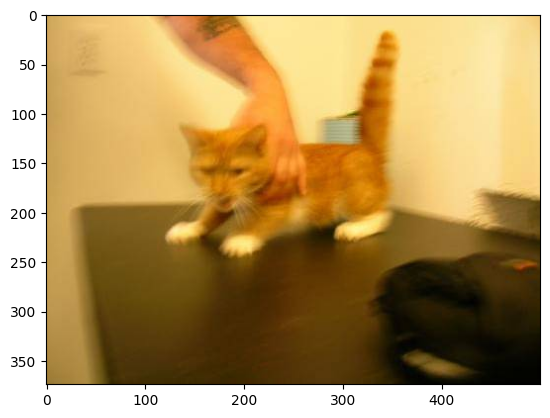

In [21]:
catImage = ppltimg.imread("train/cat.0.jpg")

pplt.imshow(catImage)

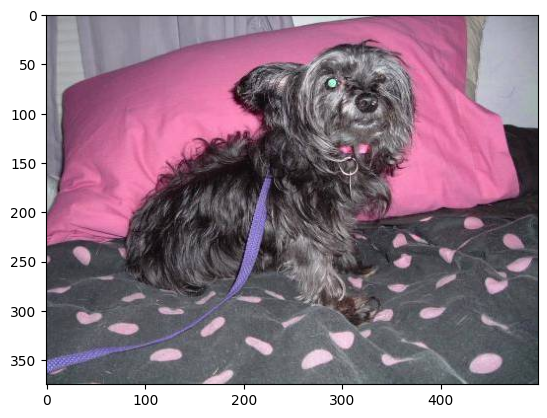

In [22]:
dogImage = ppltimg.imread("train/dog.0.jpg")

pplt.imshow(dogImage)

In [23]:
#import PIL


#for fileName in trainingData:
#    image = PIL.Image.open("train/" + fileName)
#    image = image.resize((224, 224))
#    image = image.convert("RGB")
    
#    image.save("resized/" + fileName)

In [24]:
import cv2
import numpy as np

letCatDogImagesList = []

for fileName in trainingData:
    image = cv2.imread("resized/" + fileName)
    
    letCatDogImagesList.append(image)

letCatDogImagesList = np.asarray(letCatDogImagesList)

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: pr

In [25]:
labels = np.asarray(labels)

x_train, x_test, y_train, y_test = train_test_split(letCatDogImagesList, labels, test_size = 0.2, random_state = 2)

x_train_scaled = x_train / 255
x_test_scaled = x_train / 255

#########################################################################################################################################################

In [26]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [27]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [28]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [29]:
model.fit(x_train_scaled, y_train, epochs = 5) ##########################################################################################################

Epoch 1/5
275/275 [==============================] - 38s 132ms/step - loss: 0.0936 - acc: 0.9635
Epoch 2/5
275/275 [==============================] - 36s 133ms/step - loss: 0.0526 - acc: 0.9811
Epoch 3/5
275/275 [==============================] - 38s 138ms/step - loss: 0.0438 - acc: 0.9847
Epoch 4/5
275/275 [==============================] - 38s 137ms/step - loss: 0.0363 - acc: 0.9870
Epoch 5/5
275/275 [==============================] - 37s 135ms/step - loss: 0.0332 - acc: 0.9885


In [30]:
score, acc = model.evaluate(x_test_scaled, y_test)

print("Score", score)
print("Accuracy", acc)

ValueError: Data cardinality is ambiguous:
  x sizes: 8800
  y sizes: 2200
Make sure all arrays contain the same number of samples.

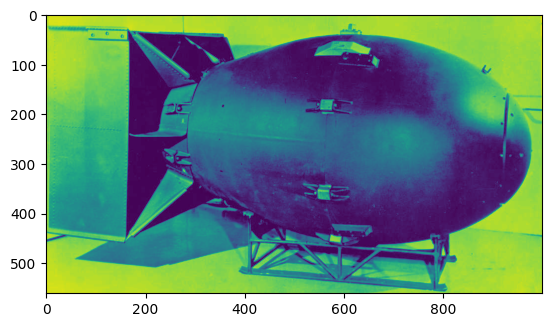

In [43]:
imageNumber = "A-leopard-800x603.webp"

# testImg = ppltimg.imread(f"test1/{imageNumber}")


testImg = ppltimg.imread("fat_man_nuclear_bomb_wide-2ef5944e81c7bcfcd2daec9a808f64fad555de58-s1100-c50.jpeg")
pplt.imshow(testImg)

In [44]:
inputImage = cv2.imread("fat_man_nuclear_bomb_wide-2ef5944e81c7bcfcd2daec9a808f64fad555de58-s1100-c50.jpeg")

inputImage = cv2.resize(inputImage, (224, 224))

inputImage = inputImage / 255

inputImage = np.reshape(inputImage, [1, 224, 224, 3])

prediciton = model.predict(inputImage)

print(prediciton)

catOrDog = np.argmax(prediciton)

print(catOrDog)

1/1 [==============================] - 0s 23ms/step
[[-1.5089921   0.35775098]]
1
